# Changing Colorspaces

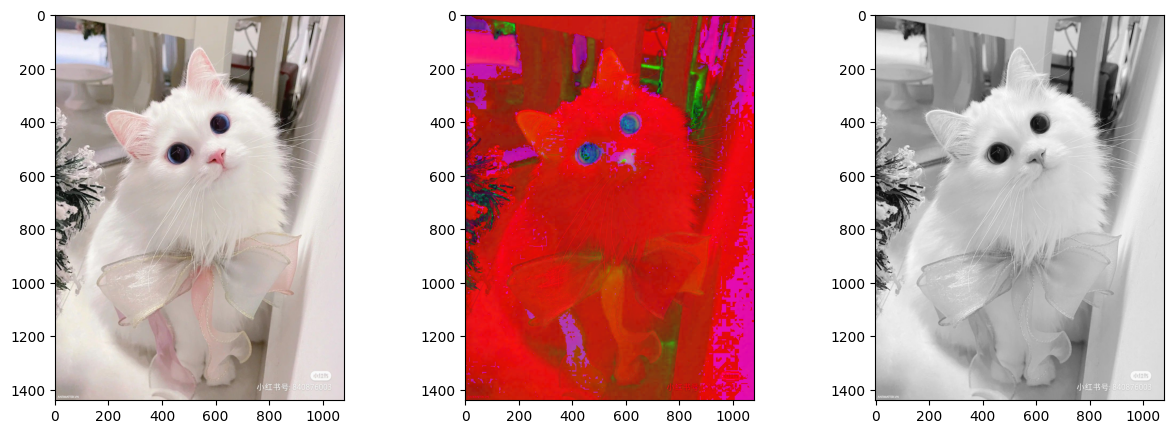

In [39]:
# Changing Color-space
# For color conversion, we use the function cv2.cvtColor(input_image, flag) where flag determines the type of conversion.
# For BGR -> Gray conversion we use the flags cv2.COLOR_BGR2GRAY. 
# For BGR -> HSV, we use the flag cv2.COLOR_BGR2HSV. 

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('1.jpg')

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=[15,5])

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(132)
plt.imshow(cv2.cvtColor(image_hsv, cv2.COLOR_BGR2RGB))

plt.subplot(133)
plt.imshow(cv2.cvtColor(image_gray, cv2.COLOR_BGR2RGB))

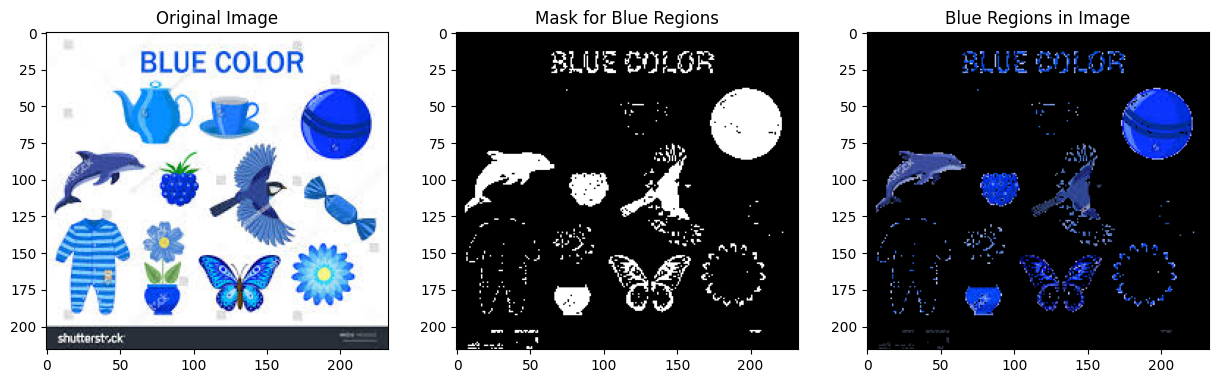

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('blue_image.jpg')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# ƒê·ªãnh nghƒ©a ph·∫°m vi m√†u xanh lam trong kh√¥ng gian m√†u HSV
# Hue kho·∫£ng t·ª´ 110-130, Saturation v√† Value c√≥ th·ªÉ t√πy ch·ªânh theo nhu c·∫ßu
lower_blue = np.array([110, 50, 50])
upper_blue = np.array([130, 255, 255])

# T·∫°o m·∫∑t n·∫° ƒë·ªÉ ch·ªâ ch·ª©a c√°c v√πng m√†u xanh lam c·ªßa image_hsv
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# √Åp d·ª•ng m·∫∑t n·∫° l√™n h√¨nh ·∫£nh g·ªëc ƒë·ªÉ ch·ªâ hi·ªÉn th·ªã khu v·ª±c m√†u xanh lam
blue_regions = cv2.bitwise_and(image, image, mask=mask)

# Hi·ªÉn th·ªã ·∫£nh g·ªëc v√† ·∫£nh ch·ªâ ch·ª©a v√πng m√†u xanh lam
plt.figure(figsize=[15, 5])

# Hi·ªÉn th·ªã ·∫£nh g·ªëc
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

# Hi·ªÉn th·ªã m·∫∑t n·∫°
plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title("Mask for Blue Regions")

# Hi·ªÉn th·ªã ·∫£nh v·ªõi ch·ªâ v√πng m√†u xanh lam
plt.subplot(133)
plt.imshow(cv2.cvtColor(blue_regions, cv2.COLOR_BGR2RGB))
plt.title("Blue Regions in Image")

plt.show()

In [41]:
# x√°c ƒë·ªãnh ph·∫°m vi m√†u trong kh√¥ng gian HSV
blue = np.uint8([[[255, 0, 0]]])
hsv_blue = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
print(hsv_blue)

# l·∫•y [H-10, 100,100] v√† [H+10, 255, 255] nh∆∞ gi·ªõi h·∫°n d∆∞·ªõi v√† gi·ªõi h·∫°n tr√™n

[[[120 255 255]]]


# Image Thresholding
Image Thresholding l√† m·ªôt k·ªπ thu·∫≠t x·ª≠ l√Ω ·∫£nh nh·∫±m ph√¢n ƒëo·∫°n h√¨nh ·∫£nh th√†nh c√°c v√πng d·ª±a tr√™n ƒë·ªô s√°ng c·ªßa pixel. √ù t∆∞·ªüng ch√≠nh l√† ch·ªçn m·ªôt gi√° tr·ªã ng∆∞·ª°ng (threshold value) v√† g√°n m·ªôt gi√° tr·ªã m·ªõi cho c√°c pixel d·ª±a tr√™n vi·ªác ch√∫ng c√≥ l·ªõn h∆°n hay nh·ªè h∆°n gi√° tr·ªã ng∆∞·ª°ng ƒë√≥.

C√°c k·ªπ thu·∫≠t thresholding th∆∞·ªùng ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ ph√¢n bi·ªát ƒë·ªëi t∆∞·ª£ng (foreground) kh·ªèi n·ªÅn (background) trong c√°c h√¨nh ·∫£nh grayscale.

C√°c lo·∫°i Thresholding c∆° b·∫£n
1. Simple Thresholding: ƒê∆°n gi·∫£n nh·∫•t l√† ch·ªçn m·ªôt gi√° tr·ªã ng∆∞·ª°ng c·ªë ƒë·ªãnh. Pixel n√†o c√≥ gi√° tr·ªã l·ªõn h∆°n ng∆∞·ª°ng s·∫Ω ƒë∆∞·ª£c g√°n m·ªôt gi√° tr·ªã m·ªõi (th∆∞·ªùng l√† m√†u tr·∫Øng - 255), c√≤n l·∫°i s·∫Ω ƒë∆∞·ª£c g√°n m√†u ƒëen (0).
2. Adaptive Thresholding: Khi h√¨nh ·∫£nh c√≥ c√°c v√πng s√°ng t·ªëi kh√¥ng ƒë·ªìng ƒë·ªÅu, adaptive thresholding gi√∫p ch·ªçn gi√° tr·ªã ng∆∞·ª°ng kh√°c nhau cho c√°c ph·∫ßn nh·ªè c·ªßa ·∫£nh d·ª±a tr√™n c√°c t√≠nh to√°n c·ª•c b·ªô (local).
3. Otsu's Binarization: ƒê√¢y l√† ph∆∞∆°ng ph√°p t·ª± ƒë·ªông t√¨m ra gi√° tr·ªã ng∆∞·ª°ng t·ªëi ∆∞u ƒë·ªÉ ph√¢n ƒëo·∫°n ·∫£nh, ƒë·∫∑c bi·ªát h·ªØu √≠ch khi histogram c·ªßa ·∫£nh c√≥ 2 ƒë·ªânh (·∫£nh c√≥ hai v√πng s√°ng v√† t·ªëi r√µ r·ªát).

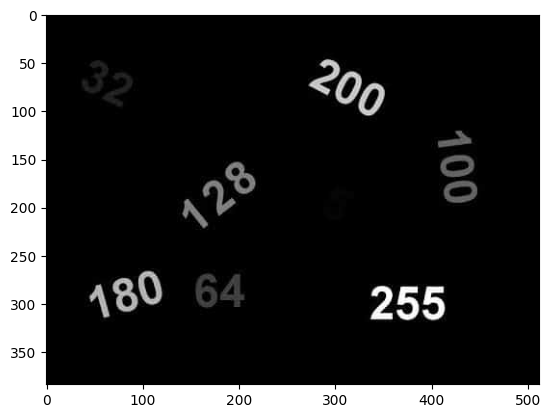

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('thresh_image.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [43]:
print(image.shape)

(384, 512, 3)


Ng∆∞·ª°ng nh·ªã ph√¢n


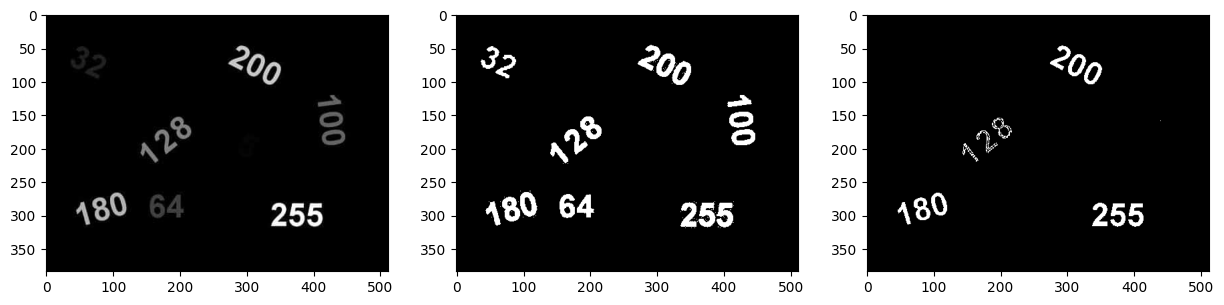

In [44]:
# if src(x,y) > thresh -->  dst(x,y) = maxValue
# else -->  dst(x,y) = 0

thresh_0 = 20
maxValue = 255
_, dst_0_255 = cv2.threshold(image, thresh_0, maxValue, cv2.THRESH_BINARY)

thresh_128 = 128
_, dst_128_255 = cv2.threshold(image, thresh_128, maxValue, cv2.THRESH_BINARY)

plt.figure(figsize=[15, 5])

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.imshow(dst_0_255, cmap='gray')
plt.subplot(133)
plt.imshow(dst_128_255, cmap='gray')

plt.show()

Ng∆∞·ª°ng nh·ªã ph√¢n ngh·ªãch ƒë·∫£o


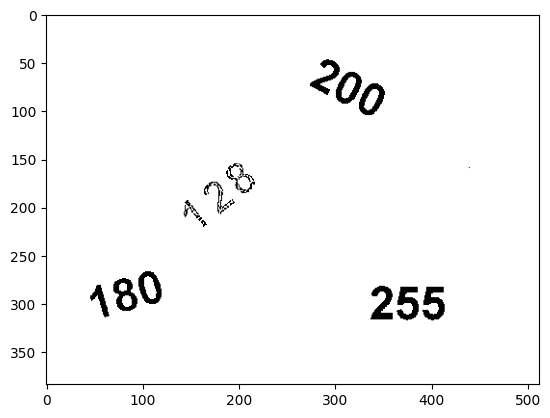

In [45]:
thresh = 128
maxValue = 255
th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_BINARY_INV)
plt.imshow(dst, cmap='gray')

Ng∆∞·ª°ng c·∫Øt b·ªõt ( THRESH_TRUNC )


127.0


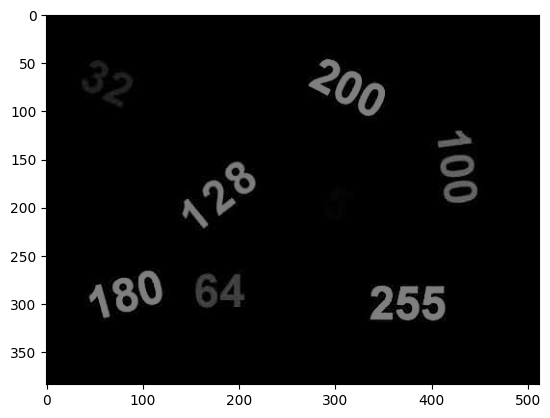

In [46]:
# if src(x,y) > thresh
#   dst(x,y) = thresh
# else
#   dst(x,y) = src(x,y)
# Tr√™n ng∆∞·ª°ng th√¨ ƒë∆∞a v·ªÅ ng∆∞·ª°ng, d∆∞·ªõi ng∆∞·ª°ng th√¨ gi·ªØ nguy√™n

thresh = 127
maxValue = 255
th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_TRUNC)
print(th)
plt.imshow(dst, cmap='gray')

Ng∆∞·ª°ng v·ªÅ 0 ( THRESH_TOZERO )


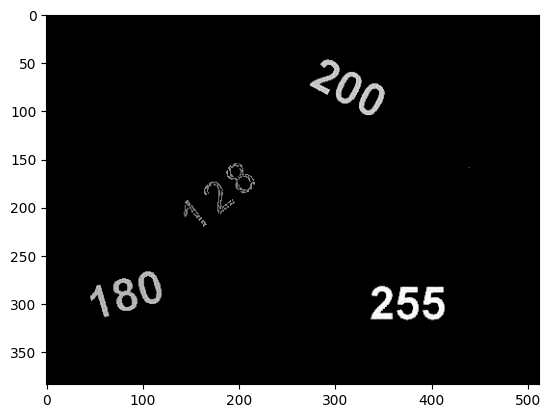

In [47]:
# if src(x,y) > thresh
#   dst(x,y) = src(x,y)
# else
#   dst(x,y) = 0
# Tr√™n ng∆∞·ª°ng th√¨ gi·ªØ nguy√™n, d∆∞·ªõi ng∆∞·ª°ng th√¨ v·ªÅ 0

thresh = 128
maxValue = 255
th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_TOZERO)
plt.imshow(dst, cmap='gray')

Ng∆∞·ª°ng ƒë·∫£o ng∆∞·ª£c v·ªÅ 0 ( THRESH_TOZERO_INV )


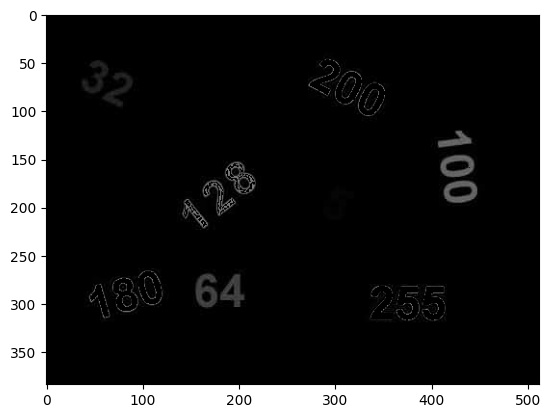

In [48]:
# if src(x,y) > thresh
#   dst(x,y) = 0
# else
#   dst(x,y) = src(x,y)
# Tr√™n ng∆∞·ª°ng th√¨ v·ªÅ 0, d∆∞·ªõi ng∆∞·ª°ng th√¨ gi·ªØ nguy√™n

thresh = 128
maxValue = 255
th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_TOZERO_INV)
plt.imshow(dst, cmap='gray')

Ng∆∞·ª°ng th√≠ch ·ª©ng


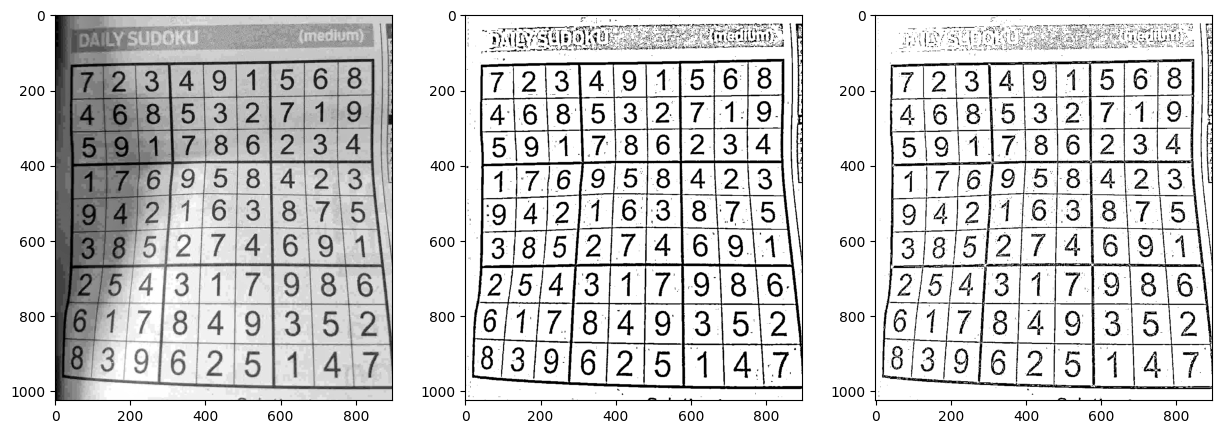

In [54]:
# Thu·∫≠t to√°n t√≠nh ng∆∞·ª°ng s·∫Ω t√≠nh gi√° tr·ªã ng∆∞·ª°ng cho m·ªói pixel ho·∫∑c m·ªói v√πng nh·ªè, t·ª©c l√† trong c√πng m·ªôt ·∫£nh s·∫Ω c√≥ gi√° tr·ªã ng∆∞·ª°ng kh√°c nhau cho 
# c√°c v√πng/pixel kh√°c nhau. V√† n√≥ mang l·∫°i hi·ªáu qu·∫£ t·ªët cho nh·ªØng ·∫£nh c√≥ nhi·ªÅu ƒë·ªô s√°ng kh√°c nhau.
#
# Adaptive Method - It decides how thresholding value is calculated.
#     --> cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.    
#     --> cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window
#
# Block Size - It decides the size of neighbourhood area 
# 
# C - It is just a constant which is subtracted from the mean or weighted mean caculate

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('adaptive_thresh.jpg', cv2.IMREAD_GRAYSCALE)

blockSize = 15

C = 15

image_median = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize, C)
image_gauss = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize, C)

plt.figure(figsize=[15, 5])

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.imshow(image_median, cmap='gray')
plt.subplot(133)
plt.imshow(image_gauss, cmap='gray')

plt.show()

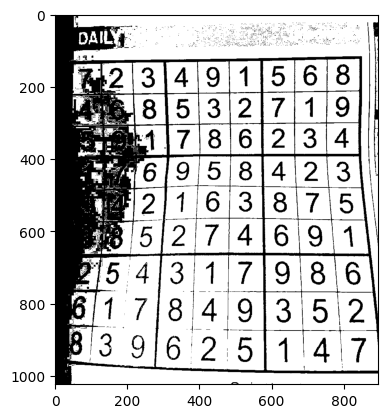

In [50]:
_, dst = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
plt.imshow(dst, cmap='gray')

Ng∆∞·ª°ng Otsu

Ng∆∞·ª°ng Otsu ho·∫°t ƒë·ªông d·ª±a tr√™n nguy√™n t·∫Øc t·ªëi ∆∞u h√≥a gi·ªØa c√°c l·ªõp (inter-class variance) c·ªßa m·ª©c x√°m trong ·∫£nh. M·ª•c ti√™u l√† t√¨m ra m·ªôt ng∆∞·ª°ng gi√° tr·ªã ùë° m√† t·∫°i ƒë√≥ ƒë·ªô l·ªách gi·ªØa c√°c l·ªõp (foreground v√† background) l√† l·ªõn nh·∫•t. C√°ch th·ª±c hi·ªán c·ª• th·ªÉ nh∆∞ sau:

1. T√≠nh Histogram: T·∫°o m·ªôt histogram c·ªßa ·∫£nh, th·ªÉ hi·ªán t·∫ßn s·ªë xu·∫•t hi·ªán c·ªßa c√°c m·ª©c x√°m t·ª´ 0 ƒë·∫øn 255.

2. T√≠nh X√°c Su·∫•t T√≠ch L≈©y: X√°c ƒë·ªãnh x√°c su·∫•t t√≠ch l≈©y v√† gi√° tr·ªã trung b√¨nh t√≠ch l≈©y cho m·ªói m·ª©c x√°m.

3. T√≠nh ƒê·ªô L·ªách Gi·ªØa C√°c L·ªõp: S·ª≠ d·ª•ng c√°c gi√° tr·ªã x√°c su·∫•t v√† trung b√¨nh t√≠ch l≈©y ƒë·ªÉ t√≠nh to√°n ƒë·ªô l·ªách gi·ªØa c√°c l·ªõp cho m·ªói ng∆∞·ª°ng gi√° tr·ªã ùë°.

4. Ch·ªçn Ng∆∞·ª°ng T·ªëi ∆Øu: T√¨m gi√° tr·ªã ng∆∞·ª°ng ùë° m√† t·∫°i ƒë√≥ ƒë·ªô l·ªách gi·ªØa c√°c l·ªõp l√† l·ªõn nh·∫•t.

X√°c su·∫•t t√≠ch l≈©y t·∫°i m·ª©c x√°m k theo c√¥ng th·ª©c P(k) = ‚àë(i=0 -> k) H(i) / N trong ƒë√≥ n l√† t·ªïng s·ªë pixel

Gi√° tr·ªã trung b√¨nh t√≠ch l≈©y t·∫°i m·ª©c x√°m k theo c√¥ng th·ª©c Œº(k) = ‚àë(i=0 -> k) i * H(i) / N

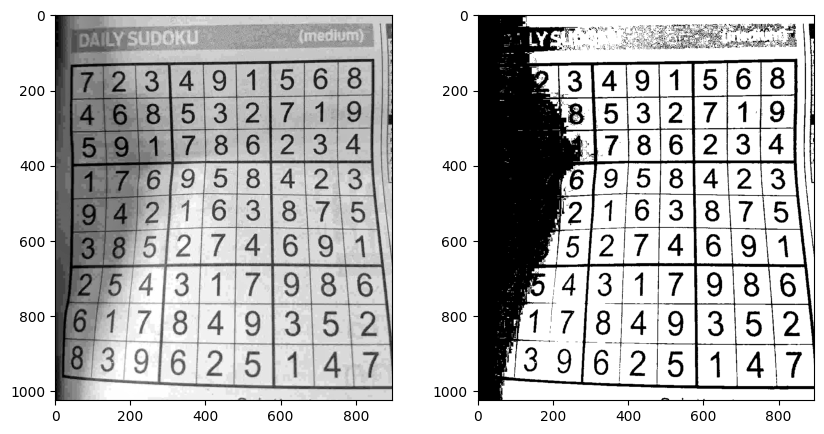

In [59]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('adaptive_thresh.jpg', cv2.IMREAD_GRAYSCALE)

# √Åp d·ª•ng ng∆∞·ª°ng Otsu
# L∆∞u √Ω r·∫±ng n√™n truy·ªÅn gi√° tr·ªã ng∆∞·ª°ng ban ƒë·∫ßu b·∫±ng 0
# v√† ch·ªâ ƒë·ªãnh lo·∫°i ph√¢n ng∆∞·ª°ng b·∫±ng cv2.THRESH_BINARY + cv2.THRESH_OTSU
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=[10, 5])
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.imshow(otsu_thresh, cmap='gray')
plt.show()

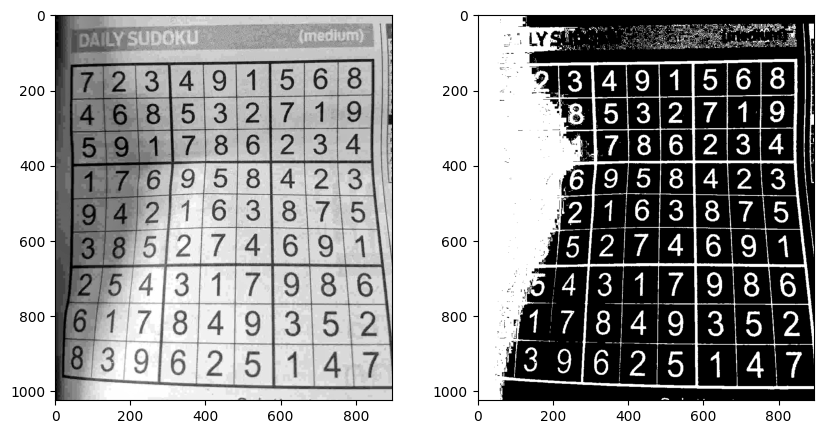

In [58]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('adaptive_thresh.jpg', cv2.IMREAD_GRAYSCALE)

# √Åp d·ª•ng ng∆∞·ª°ng Otsu
# L∆∞u √Ω r·∫±ng n√™n truy·ªÅn gi√° tr·ªã ng∆∞·ª°ng ban ƒë·∫ßu b·∫±ng 0
# v√† ch·ªâ ƒë·ªãnh lo·∫°i ph√¢n ng∆∞·ª°ng b·∫±ng cv2.THRESH_BINARY + cv2.THRESH_OTSU
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.figure(figsize=[10, 5])
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.imshow(otsu_thresh, cmap='gray')
plt.show()